# Drug performance evaluation and recommedation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
data = pd.read_csv('../data/raw/Drug_clean.csv')
data.head()

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     685 non-null    object 
 1   Drug          685 non-null    object 
 2   EaseOfUse     685 non-null    float64
 3   Effective     685 non-null    float64
 4   Form          685 non-null    object 
 5   Indication    685 non-null    object 
 6   Price         685 non-null    float64
 7   Reviews       685 non-null    float64
 8   Satisfaction  685 non-null    float64
 9   Type          685 non-null    object 
dtypes: float64(5), object(5)
memory usage: 53.6+ KB


Renaming column names

In [93]:
data = data.rename(columns = {'Condition': 'condition', 'Drug':'drug', 'Indication':'indication',
                          'Type':'type', 'Effective':'effective', 'Reviews':'review', 
                          'EaseOfUse':'ease_of_use', 'Satisfaction': 'satisfaction', 
                          'Price':'price', 'Form':'form'})

In [94]:
data.isna().sum()

condition       0
drug            0
ease_of_use     0
effective       0
form            0
indication      0
price           0
review          0
satisfaction    0
type            0
dtype: int64

In [83]:
data.shape

(685, 10)

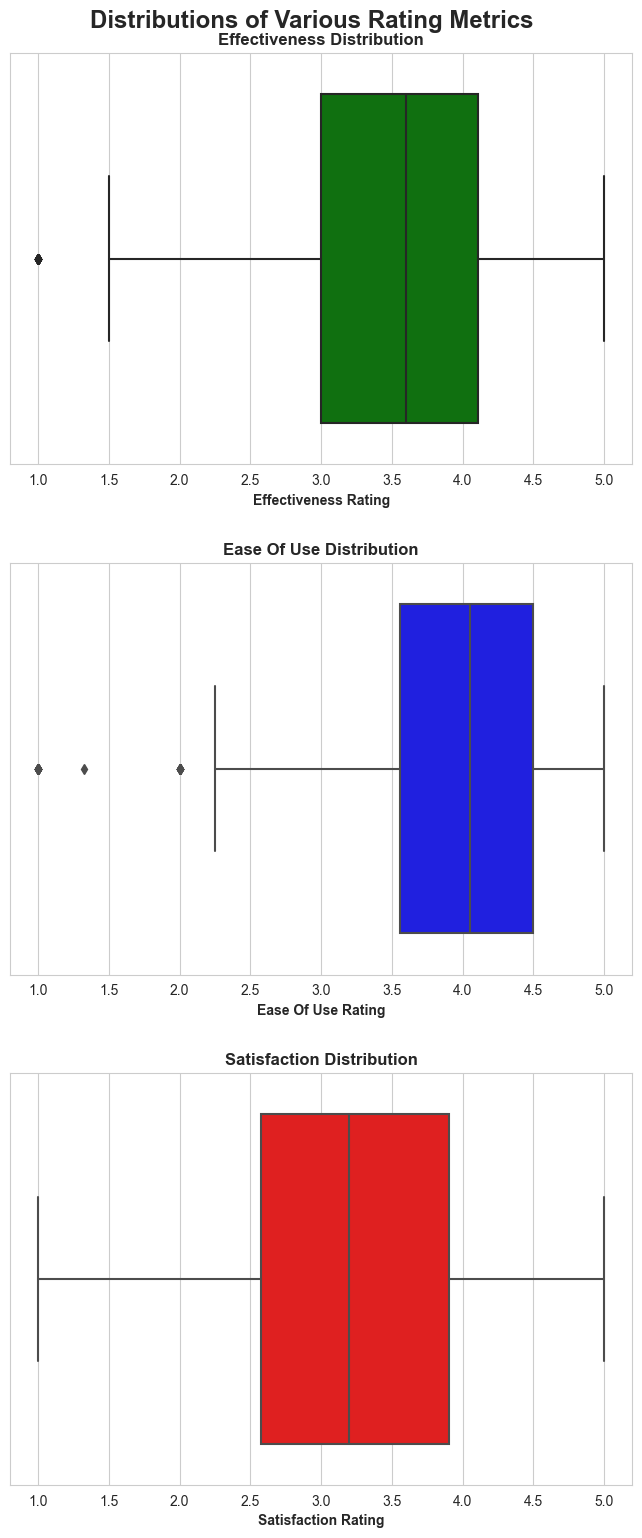

In [209]:
# The distribution of Various Ratings

fig, ax = plt.subplots(3, 1, figsize=(8, 16))

fig.tight_layout(pad=5.0)

fig.suptitle('Distributions of Various Rating Metrics', fontweight='heavy', size='xx-large')

sns.boxplot(ax=ax[0], data=data, x='effective', color='green')
sns.boxplot(ax=ax[1], data=data, x='ease_of_use', color='blue')
sns.boxplot(ax=ax[2], data=data, x='satisfaction', color='red')

ax[0].set_xlabel('Effectiveness Rating', fontweight='bold')
ax[1].set_xlabel('Ease Of Use Rating', fontweight='bold')
ax[2].set_xlabel('Satisfaction Rating', fontweight='bold')

ax[0].set_title('Effectiveness Distribution', fontweight='bold')
ax[1].set_title('Ease Of Use Distribution', fontweight='bold')
ax[2].set_title('Satisfaction Distribution', fontweight='bold')

plt.savefig('../images/boxplots2.png')

plt.show()


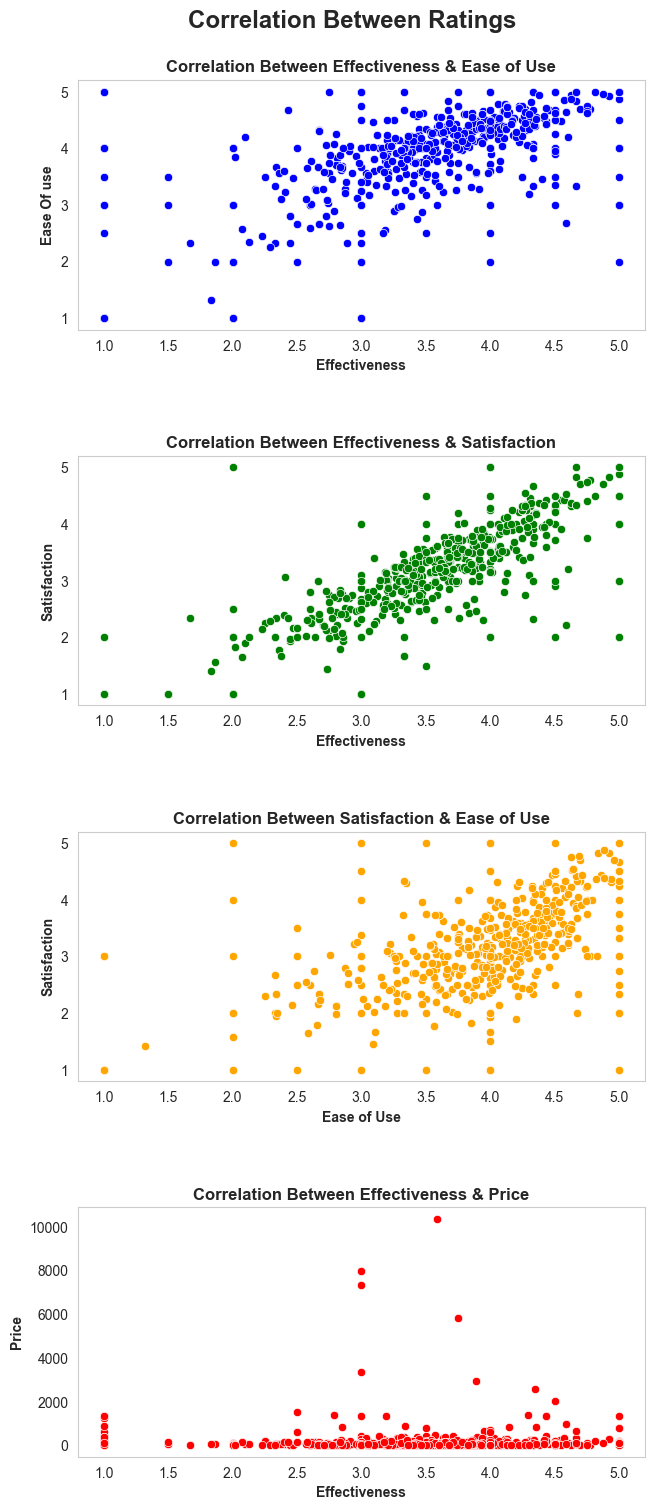

In [125]:
# Correlation between ratings

fig, ax = plt.subplots(4, 1, figsize=(8, 16))

fig.tight_layout(pad=7.0)

fig.suptitle('Correlation Between Ratings', fontweight='heavy', size='xx-large')

sns.scatterplot(ax=ax[0], data=data, x='effective', y='ease_of_use', color='blue')
sns.scatterplot(ax=ax[1], data=data, x='effective', y='satisfaction', color='green')
sns.scatterplot(ax=ax[2], data=data, x='ease_of_use', y='satisfaction', color='orange')
sns.scatterplot(ax=ax[3], data=data, x='effective', y='price', color='red')

ax[0].set_title('Correlation Between Effectiveness & Ease of Use', fontweight='bold')
ax[0].set_ylabel('Ease Of use', fontweight='bold')
ax[0].set_xlabel('Effectiveness', fontweight='bold')
ax[0].grid(False)

ax[1].set_title('Correlation Between Effectiveness & Satisfaction', fontweight='bold')
ax[1].set_ylabel('Satisfaction', fontweight='bold')
ax[1].set_xlabel('Effectiveness', fontweight='bold')
ax[1].grid(False)

ax[2].set_title('Correlation Between Satisfaction & Ease of Use', fontweight='bold')
ax[2].set_ylabel('Satisfaction', fontweight='bold')
ax[2].set_xlabel('Ease of Use', fontweight='bold')
ax[2].grid(False)

ax[3].set_title('Correlation Between Effectiveness & Price', fontweight='bold')
ax[3].set_ylabel('Price', fontweight='bold')
ax[3].set_xlabel('Effectiveness', fontweight='bold')
ax[3].grid(False)

plt.savefig('../images/scatterplots.png')

plt.show()


Correlation matrix

In [108]:
num_data = pd.DataFrame(data.select_dtypes(include='number'))
correlations_matrix = num_data.corr()
correlations_matrix

,ease_of_use,effective,price,review,satisfaction
ease_of_use,1.000000,0.659237,-0.107480,0.011962,0.650156
effective,0.659237,1.000000,-0.017532,-0.035802,0.864863
price,-0.107480,-0.017532,1.000000,-0.024927,-0.024800
review,0.011962,-0.035802,-0.024927,1.000000,-0.084216
satisfaction,0.650156,0.864863,-0.024800,-0.084216,1.000000


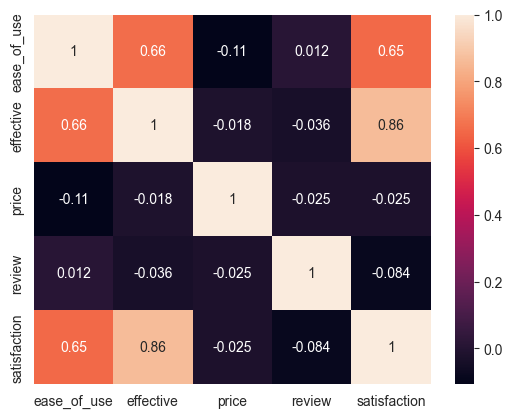

In [118]:
sns.heatmap(num_data.corr(), annot=True)
plt.savefig('../images/corrplot.png')

Creating categorical columns from numerial columns

In [95]:
def categorize_effectiveness(effective):
    if effective < 1.0 : return 'Very Uneffective'
    elif effective < 2.0 : return 'Uneffective'
    elif effective < 3.0 : return 'Partly Effective'
    elif effective < 4.0 : return 'More Than Effective'
    elif effective <= 5.0 : return 'Very Effective'
    
data['effective_cat'] = data['effective'].apply(categorize_effectiveness)

In [96]:
def categorize_satisfaction(satisfaction):
    if satisfaction < 1.0 : return 'Very Unsatisfied'
    elif satisfaction < 2.0 : return 'Unsatisfied'
    elif satisfaction < 3.0 : return 'Partly Satisfied'
    elif satisfaction < 4.0 : return 'More Than Satisfied'
    elif satisfaction <= 5.0 : return 'Very Satisfied'
    
data['satisfaction_cat'] = data['satisfaction'].apply(categorize_satisfaction)

In [97]:
def categorize_ease_of_use(easeOfUse):
    if easeOfUse < 1.0 : return 'Very Difficult'
    elif easeOfUse < 2.0 : return 'Difficult'
    elif easeOfUse < 3.0 : return 'Normal'
    elif easeOfUse < 4.0 : return 'Easy'
    elif easeOfUse <= 5.0 : return 'Very Easy'
    
data['ease_of_use_cat'] = data['ease_of_use'].apply(categorize_ease_of_use)
data

,condition,drug,ease_of_use,effective,form,indication,price,review,satisfaction,type,effective_cat,satisfaction_cat,ease_of_use_cat
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX,More Than Effective,More Than Satisfied,Easy
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX,More Than Effective,Partly Satisfied,Easy
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX,Partly Effective,Partly Satisfied,Easy
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX,More Than Effective,Unsatisfied,Normal
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX,More Than Effective,More Than Satisfied,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,vulvovaginal candidiasis,Miconazole Nitrate,3.465000,2.770000,Cream,On Label,13.990000,19.500000,2.345000,RX/OTC,Partly Effective,Partly Satisfied,Easy
681,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.750000,3.000000,Cream,On Label,13.990000,4.000000,3.000000,OTC,More Than Effective,More Than Satisfied,Very Easy
682,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.000000,1.000000,Other,On Label,125.990000,1.000000,1.000000,OTC,Uneffective,Unsatisfied,Very Easy
683,vulvovaginal candidiasis,Terconazole,3.525000,3.047500,Cream,On Label,68.990000,20.000000,2.717500,RX,More Than Effective,Partly Satisfied,Easy


In [19]:
data['condition'].value_counts()
# hypertension makes 14.7% of the conditions reported in the dataset

condition
hypertension                                 101
Atopic Dermatitis                             67
fever                                         64
gastroesophageal reflux disease               54
Bacterial Urinary Tract Infection             53
hypercholesterolemia                          32
hemorrhoids                                   31
gout                                          31
endometriosis                                 19
Pharyngitis due to Streptococcus Pyogenes     19
back pain                                     17
diverticulitis of gastrointestinal tract      16
Bacterial Conjunctivitis                      16
flatulence                                    15
depression                                    15
edema                                         15
prevention of cerebrovascular accident        14
Acute Bacterial Sinusitis                     14
vertigo                                       13
fibromyalgia                                  12
vulvovagin

In [70]:
data.groupby('condition')['price'].mean().sort_values(ascending=False)

condition
adenocarcinoma of pancreas                   2542.527500
Sleepiness Due To Obstructive Sleep Apnea     753.040000
Infantile Autism                              564.490000
diverticulitis of gastrointestinal tract      533.963929
genital herpes simplex                        453.425000
endometriosis                                 442.583537
hypercholesterolemia                          353.045312
Atopic Dermatitis                             285.162338
scabies                                       259.232500
prevention of cerebrovascular accident        186.670714
impetigo                                      184.390000
pyelonephritis                                172.990000
fibromyalgia                                  166.036389
herpes zoster                                 152.640000
chickenpox                                    144.590000
furunculosis                                  123.490000
Acute Bacterial Sinusitis                     123.230969
Pharyngitis due to St

/var/folders/qk/1vyqczmd3c30kgcpdk2v9wfw0000gn/T/ipykernel_37101/972396070.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


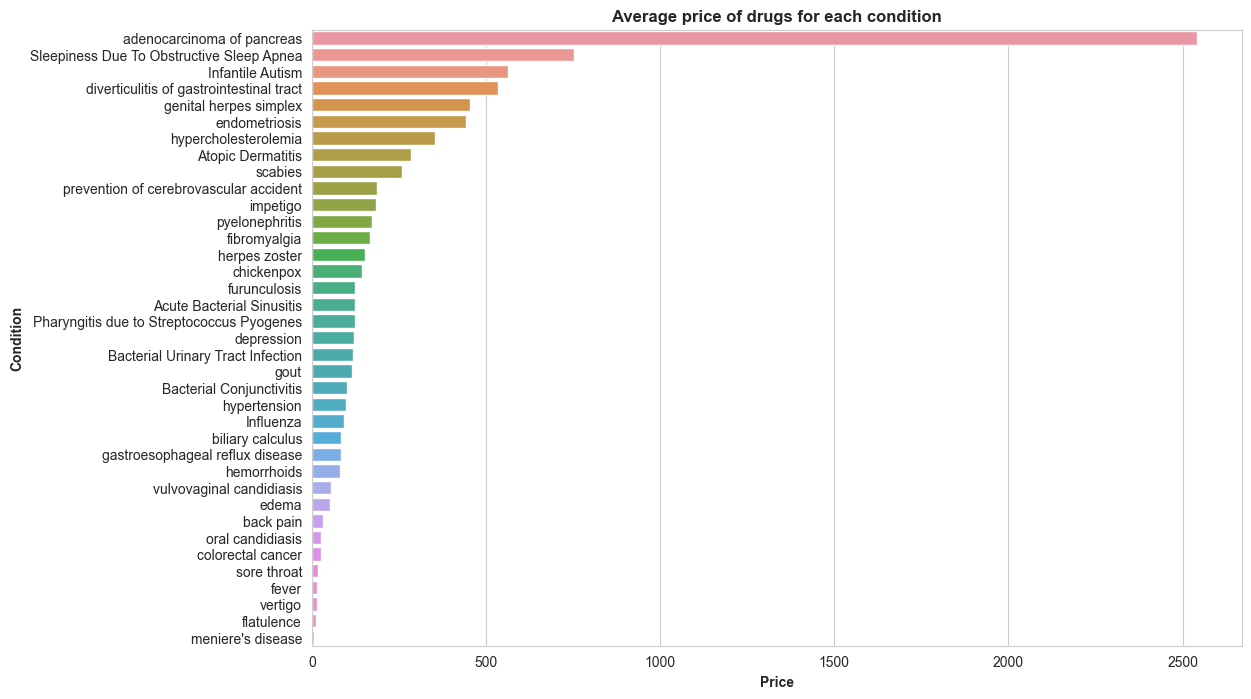

In [212]:
plt.figure(figsize=(12, 8))  # set the figure size

sns.barplot(
    data=data,
    y='condition',
    x='price',
    estimator=np.mean,
    order=data.groupby('condition')['price'].mean().sort_values(ascending=False).index,
    ci=None
)

plt.title('Average price of drugs for each condition', fontweight='bold')
plt.xlabel('Price', fontweight='bold')
plt.ylabel('Condition', fontweight='bold')
plt.savefig('../images/condition_price_plot.png')
plt.show()


In [80]:
data['drug'].value_counts()

drug
Niacin                         8
Naproxen Sodium                7
Hydrocortisone                 7
Ibuprofen                      6
Amoxicillin-Pot Clavulanate    5
                              ..
Ampicillin-Sulbactam           1
Protriptyline                  1
Phenelzine                     1
Maprotiline                    1
Tioconazole                    1
Name: count, Length: 470, dtype: int64

/var/folders/qk/1vyqczmd3c30kgcpdk2v9wfw0000gn/T/ipykernel_37101/1328051121.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


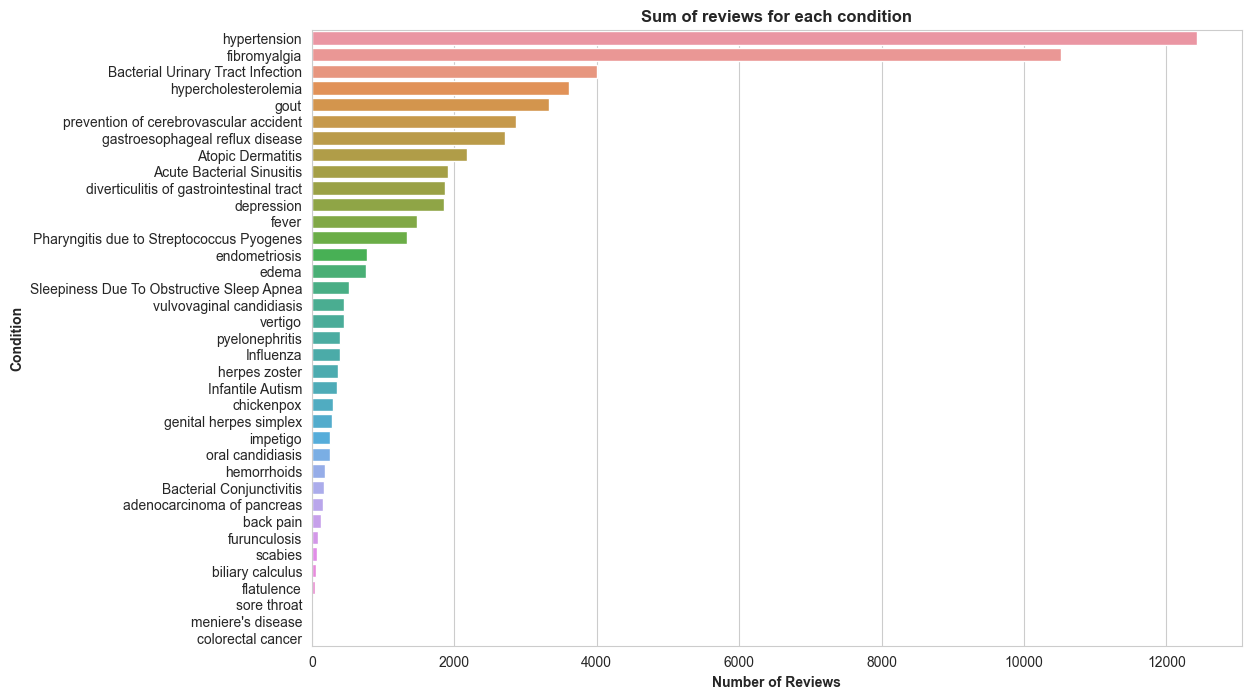

In [210]:
plt.figure(figsize=(12, 8))  # set the figure size

sns.barplot(
    data=data,
    y='condition',
    x='review',
    estimator=np.sum,
    order=data.groupby('condition')['review'].sum().sort_values(ascending=False).index,
    ci=None
)

plt.title('Sum of reviews for each condition', fontweight='bold')
plt.xlabel('Number of Reviews', fontweight='bold')
plt.ylabel('Condition', fontweight='bold')  # remove the grid lines
plt.savefig('../images/condition_review_plot.png')
plt.show()


In [111]:
data['form'].unique()

array(['Capsule', 'Liquid (Drink)', 'Tablet', 'Cream', 'Liquid (Inject)',
       'Other'], dtype=object)

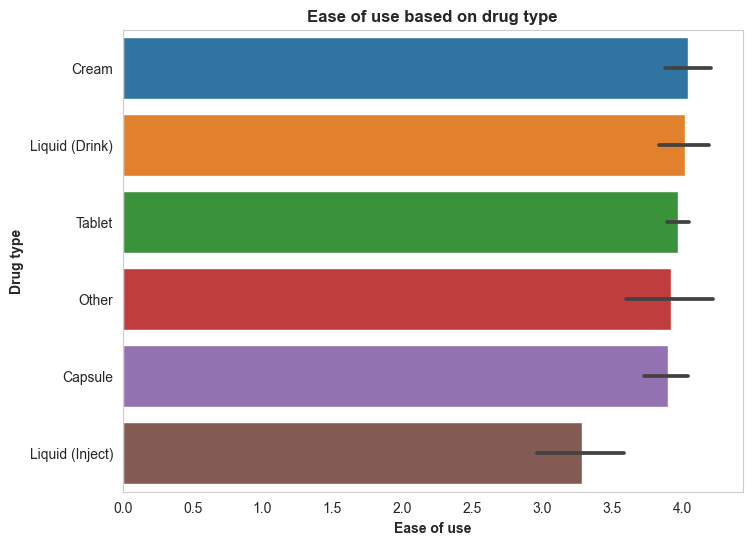

In [207]:
# Plotting ease of use based on drug type

plt.figure(figsize=(8, 6))  # set the figure size

sns.barplot(
    data=data,
    y='form',
    x='ease_of_use',
    order=data.groupby('form')['ease_of_use'].mean().sort_values(ascending=False).index
)

plt.title('Ease of use based on drug type', fontweight='bold')
plt.xlabel('Ease of use', fontweight='bold')
plt.ylabel('Drug type', fontweight='bold')
plt.grid(False)  # remove the grid lines

plt.savefig('../images/type_plot.png')
plt.show()


In [98]:
popular_drugs = data.sort_values(by='review', ascending=False).head(10)
popular_drugs

,condition,drug,ease_of_use,effective,form,indication,price,review,satisfaction,type,effective_cat,satisfaction_cat,ease_of_use_cat
339,fibromyalgia,Duloxetine,4.130000,3.4100,Other,On Label,24.23,4647.000,3.080000,RX,More Than Effective,More Than Satisfied,Very Easy
346,fibromyalgia,Pregabalin,4.070000,3.3800,Capsule,On Label,196.99,3066.000,3.000000,RX,More Than Effective,More Than Satisfied,Very Easy
576,hypertension,Lisinopril,4.076667,3.4500,Tablet,On Label,14.79,2867.000,2.653333,RX,More Than Effective,Partly Satisfied,Very Easy
336,fibromyalgia,Amitriptyline,4.290000,3.5300,Capsule,Off Label,196.99,1126.000,3.150000,RX,More Than Effective,More Than Satisfied,Very Easy
72,Atopic Dermatitis,Prednisone,3.965000,3.3275,Tablet,On Label,397.99,969.875,3.027500,RX,More Than Effective,More Than Satisfied,Easy
445,gout,Meloxicam,4.195000,3.4200,Tablet,Off Label,32.99,813.000,3.120000,RX,More Than Effective,More Than Satisfied,Very Easy
522,hypercholesterolemia,Simvastatin,3.815000,3.1000,Tablet,On Label,28.99,806.000,2.240000,RX,More Than Effective,Partly Satisfied,Easy
646,prevention of cerebrovascular accident,Simvastatin,3.815000,3.1000,Tablet,On Label,28.99,806.000,2.240000,RX,More Than Effective,Partly Satisfied,Easy
207,depression,Amitriptyline,4.220000,3.4450,Liquid (Inject),On Label,25.99,767.500,3.085000,RX,More Than Effective,More Than Satisfied,Very Easy
311,fever,Naproxen,3.700000,2.8200,Tablet,On Label,15.59,740.000,2.420000,RX,Partly Effective,Partly Satisfied,Easy


<Axes: xlabel='effective', ylabel='drug'>

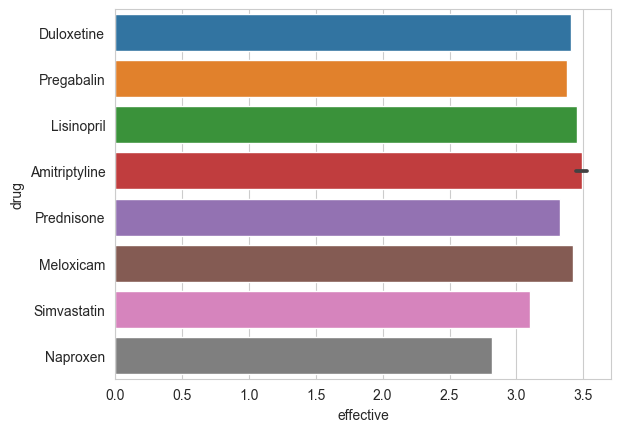

In [79]:
sns.barplot(data=popular_drugs, y='drug', x='effective')

In [77]:
popular_drugs.groupby('drug')['effective'].mean().sort_values(ascending=False)

drug
Amitriptyline    3.4875
Lisinopril       3.4500
Meloxicam        3.4200
Duloxetine       3.4100
Pregabalin       3.3800
Prednisone       3.3275
Simvastatin      3.1000
Naproxen         2.8200
Name: effective, dtype: float64

Drug recommendation function

In [168]:
def recommend_drugs(condition):
    # Load the Drug_clean.csv file into a DataFrame
    df = data.copy()

    # Filter the DataFrame to include only drugs that match the given condition
    drugs = df[df['condition'] == condition]

    # Sort the drugs by effectiveness, ease of use, review, and satisfaction in descending order
    drugs = drugs.sort_values(by=['review','effective', 'ease_of_use', 'satisfaction'], ascending=False)

    # Select the top 10 drugs
    drugs = drugs.head(10)
    
    # Add dollar signs to the price column
    drugs['price'] = drugs['price'].apply(lambda x: '${:.2f}'.format(x))

    # Create a new DataFrame with the recommended drugs and their ratings
    recommended_drugs = drugs[['drug', 'effective_cat', 'ease_of_use_cat', 'satisfaction_cat', 'price', 'review']]

    # Print the list of recommended drugs
    print("\033[32mBased on your condition, we recommend the following drugs \033[0m")

    # Print a cautionary statement
    print("\033[91m\nPlease note that this recommendation is based on data and may not be suitable for everyone. " \
          "\nAlways consult your doctor before taking any medication, and be sure to confirm that you are \nnot allergic to "\
          "any of the recommended drugs before taking them. \033[0m")

    # Return the DataFrame with the recommended drugs and their ratings
    return recommended_drugs


In [211]:
recommend_drugs('hypertension')

Based on your condition, we recommend the following drugs 

Please note that this recommendation is based on data and may not be suitable for everyone. 
Always consult your doctor before taking any medication, and be sure to confirm that you are 
not allergic to any of the recommended drugs before taking them. 


,drug,effective_cat,ease_of_use_cat,satisfaction_cat,price,review
576,Lisinopril,More Than Effective,Very Easy,Partly Satisfied,$14.79,2867.0
526,Amlodipine,More Than Effective,Easy,Partly Satisfied,$57.99,730.0
584,Metoprolol Succinate,More Than Effective,Easy,Partly Satisfied,$40.99,695.5
578,Losartan,Partly Effective,Easy,Partly Satisfied,$67.99,595.0
619,Valsartan,More Than Effective,Easy,Partly Satisfied,$111.99,470.5
590,Nebivolol,More Than Effective,Very Easy,More Than Satisfied,$180.99,458.0
532,Atenolol,More Than Effective,Very Easy,More Than Satisfied,$16.39,446.0
620,Valsartan-Hydrochlorothiazide,More Than Effective,Very Easy,More Than Satisfied,$225.99,418.0
586,Metoprolol Tartrate,More Than Effective,Easy,Partly Satisfied,$107.49,369.5
547,Carvedilol,More Than Effective,Easy,Partly Satisfied,$81.99,333.0


In [45]:
data1 = data.copy()

In [46]:
data1 = data1[data1['condition'].isin(['hypertension', 'Atopic Dermatitis', 'fever', 'gastroesophageal reflux disease', 'Bacterial Urinary Tract Infection'])]
# np.where(condition, value_if_True, value_if_False)

In [47]:
data1

,condition,drug,ease_of_use,effective,form,indication,price,review,satisfaction,type
14,Atopic Dermatitis,Alclometasone,5.000000,2.750000,Cream,On Label,41.990000,4.0,2.750000,RX
15,Atopic Dermatitis,Amcinonide,5.000000,5.000000,Cream,On Label,224.770000,2.5,5.000000,RX
16,Atopic Dermatitis,"Betamethasone Acet,Sod Phos",4.335000,4.000000,Liquid (Inject),On Label,53.990000,15.0,4.000000,RX
17,Atopic Dermatitis,Betamethasone Dipropionate,4.700000,4.273333,Cream,On Label,71.723333,40.0,4.333333,RX
18,Atopic Dermatitis,Betamethasone Valerate,4.740000,4.220000,Cream,On Label,45.910000,10.0,4.220000,RX
...,...,...,...,...,...,...,...,...,...,...
619,hypertension,Valsartan,3.970000,3.310000,Tablet,On Label,111.990000,470.5,2.820000,RX
620,hypertension,Valsartan-Hydrochlorothiazide,4.190000,3.850000,Tablet,On Label,225.990000,418.0,3.290000,RX
621,hypertension,Verapamil,5.000000,4.000000,Capsule,On Label,172.390000,6.0,4.000000,RX
622,hypertension,Verapamil,5.000000,5.000000,Other,On Label,173.990000,8.0,5.000000,RX


Manual testing

In [132]:
data1[(data1['condition'] == 'fever') & (data1['effective'] > 3.5)]

,condition,drug,ease_of_use,effective,form,indication,price,review,satisfaction,type
278,fever,Acetaminophen-Caffeine,4.880000,5.000000,Liquid (Drink),On Label,9.99,11.000000,4.880000,OTC
280,fever,"Acetaminophen-Pamabrom, Ibuprofen",5.000000,5.000000,Tablet,On Label,13.49,2.000000,5.000000,OTC
283,fever,Aspirin,4.640000,4.270000,Tablet,On Label,11.99,55.000000,4.550000,RX/OTC
284,fever,"Aspirin, Buffered",4.500000,4.307692,Tablet,On Label,11.99,1.692308,4.461538,OTC
285,fever,Aspirin-Acetaminophen-Caffeine,5.000000,5.000000,Liquid (Drink),On Label,10.39,1.000000,4.000000,OTC
287,fever,Aspirin-Calcium Carbonate,5.000000,5.000000,Liquid (Drink),On Label,10.29,1.000000,5.000000,OTC
288,fever,"Chlorphen-PE-DM-Acetaminophen, Cpm-Pseudoeph-D...",5.000000,5.000000,Liquid (Drink),On Label,14.99,5.000000,5.000000,OTC
290,fever,Chlorpheniram-DM-Acetaminophen,5.000000,4.333333,Liquid (Drink),On Label,8.79,1.666667,4.000000,OTC
291,fever,Chlorpheniram-DM-Acetaminophen,5.000000,5.000000,Other,On Label,19.99,8.000000,5.000000,OTC
293,fever,"Chlorpheniramine-Acetaminophen, Chlorphen-PPA-...",3.000000,4.000000,Other,On Label,10.49,4.000000,5.000000,OTC
